In [13]:
import pandas as pd
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [14]:
df.shape

(400, 5)

In [15]:
df.isnull().count()

User ID            400
Gender             400
Age                400
EstimatedSalary    400
Purchased          400
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


<Axes: >

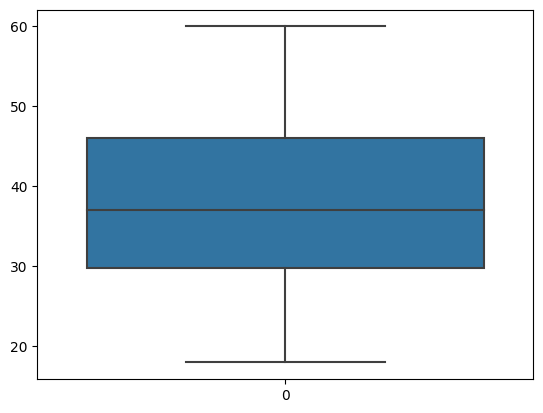

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(df['Age'])

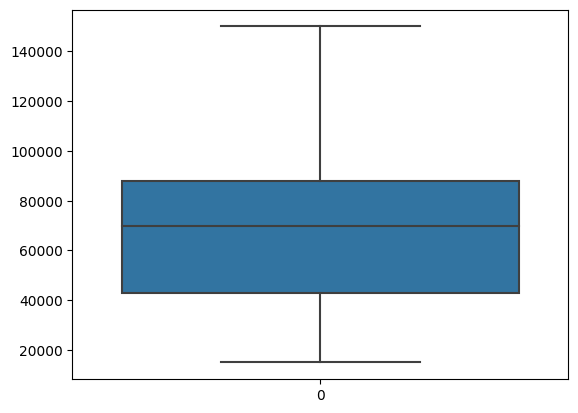

In [18]:

sns.boxplot(df['EstimatedSalary'])
plt.show()

In [19]:
#using min max to scale the estimatedsalary value as no outliers were found
for i in df.index:
    val = df.loc[i, 'EstimatedSalary']
    df.loc[i, 'EstimatedSalary'] = (val - df['EstimatedSalary'].min())/(df['EstimatedSalary'].max() - df['EstimatedSalary'].min())

In [20]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,0.029630,0
1,15810944,Male,35,0.133333,0
2,15668575,Female,26,0.286667,0
3,15603246,Female,27,0.380000,0
4,15804002,Male,19,0.506667,0


In [21]:
df.drop(['User ID','Gender'],axis=1,inplace=True)

In [22]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,0.029630,0
1,35,0.133333,0
2,26,0.286667,0
3,27,0.380000,0
4,19,0.506667,0


In [29]:
#Seperated Dependent and Independent variable
import numpy as np
X = np.c_[df['EstimatedSalary'],df['Age']]
Y = df['Purchased']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [31]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train,Y_train)

LogisticRegression()

In [32]:
Y_predict = lg.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_predict)
# cm = confusion_matrix(Y_predict,Y_test)
cm

array([[46,  5],
       [12, 17]], dtype=int64)

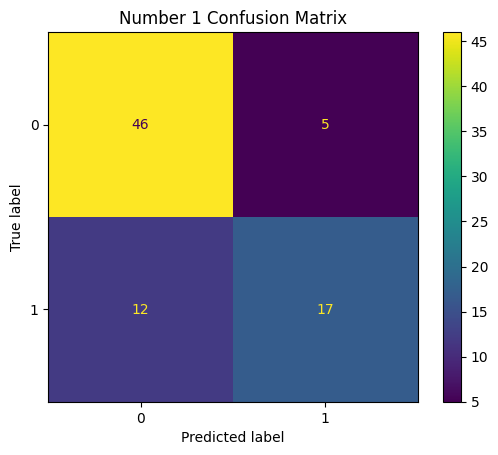

In [34]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.title("Number 1 Confusion Matrix")
plt.show()

In [38]:
#accuracy
accuracy = metrics.accuracy_score(Y_test, Y_predict)
print("Accuracy score is: ", accuracy)

Accuracy score is:  0.7875


In [39]:
print("Error is: ", 1 - accuracy)

Error is:  0.21250000000000002


In [40]:
recall = metrics.recall_score(Y_test,Y_predict, zero_division=1)
print("Recall Score is: ", recall)

Recall Score is:  0.5862068965517241


In [41]:
print("F1 score: ", metrics.f1_score(Y_test, Y_predict))

F1 score:  0.6666666666666667


In [42]:
print("Precision value is: ", metrics.precision_score(Y_test,Y_predict))

Precision value is:  0.7727272727272727
